In [171]:
!pip install tensorflow-gpu

You should consider upgrading via the 'c:\users\sampa\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [172]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [173]:
## import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [174]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [175]:
dataset.shape

(10000, 14)

In [176]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [177]:
dataset.EstimatedSalary.max()

199992.48

In [178]:
dataset['EstimatedSalary'].max()

199992.48

In [179]:
##Divide dataset into independent and dependent features
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [180]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [181]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [182]:
geography=pd.get_dummies(X["Geography"],drop_first=True)

In [183]:
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [184]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [185]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [186]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [187]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [188]:
X_train.shape

(8000, 11)

In [189]:
## Part 2 - Now let's make the ANN!
from tensorflow.keras.models import Sequential ## helps for forward and backward propagation
from tensorflow.keras.layers import Dense #### helps for creating input and hidden layers
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout ##it is a regularization parameter (like L1 L2 norm in ML),SOMETIMES model leads to
## over fitting then we need to deactivate the neurons in the hidden layers during training , if dropout set to 0.3 , 30% of 
##neurons get deactivated while training 

In [190]:
classifier2 = Sequential()

In [191]:
## adding input layer
classifier2.add(Dense(units=11,activation='relu')) ##because there are 11 inputs

In [192]:
## adding first hidden layer
classifier2.add(Dense(units=7,activation='relu'))
classifier2.add(Dropout(0.2))

In [193]:
## adding Second hidden layer
classifier2.add(Dense(units=6,activation='relu'))
classifier2.add(Dropout(0.3))

In [194]:
## adding output layer
classifier2.add(Dense(1,activation='sigmoid'))

In [195]:
## by default adam adds the learning rate of 0.1(n)
##we can also manually add the learning rate

import tensorflow
tensorflow.keras.optimizers.Adam(learning_rate=0.01)

classifier2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [196]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [198]:
model_history=classifier2.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50,callbacks=early_stopping)

Epoch 1/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4797 - accuracy: 0.7962 - val_loss: 0.4492 - val_accuracy: 0.7955
Epoch 2/50
536/536 [==============================] - 1s 1ms/step - loss: 0.4367 - accuracy: 0.7962 - val_loss: 0.4362 - val_accuracy: 0.7955
Epoch 3/50
536/536 [==============================] - 1s 1ms/step - loss: 0.4232 - accuracy: 0.7962 - val_loss: 0.4261 - val_accuracy: 0.7955
Epoch 4/50
536/536 [==============================] - 1s 1ms/step - loss: 0.4112 - accuracy: 0.8015 - val_loss: 0.4170 - val_accuracy: 0.8092
Epoch 5/50
536/536 [==============================] - 1s 1ms/step - loss: 0.4004 - accuracy: 0.8175 - val_loss: 0.4082 - val_accuracy: 0.8266
Epoch 6/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3879 - accuracy: 0.8380 - val_loss: 0.3946 - val_accuracy: 0.8334
Epoch 7/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3663 - accuracy: 0.8543 - val_loss: 0.3786 - val_accuracy: 0.8398
Epoch 

In [199]:
model_history

In [200]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

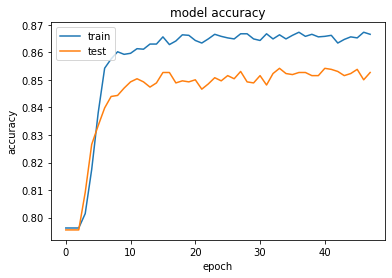

In [205]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

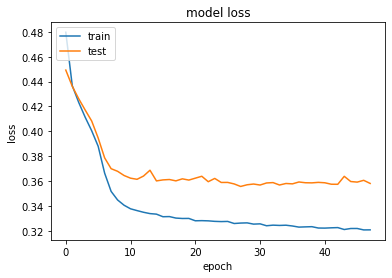

In [204]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [206]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier2.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 754us/step


In [207]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1492,  103],
       [ 189,  216]], dtype=int64)

In [208]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [209]:
score

0.854

In [213]:
## get weights
classifier2.get_weights()

[array([[-5.32093234e-02,  8.35519582e-02, -3.05238098e-01,
         -1.21554323e-01, -6.76429179e-03,  2.21532404e-01,
          1.38665661e-02,  2.22657874e-01, -2.07011729e-01,
         -2.11021021e-01,  1.65536761e-01],
        [ 9.95114446e-02, -2.14191720e-01,  8.88878554e-02,
         -6.36861563e-01, -4.67836976e-01, -7.96104610e-01,
          1.60879478e-01, -5.16031981e-01,  5.14356911e-01,
          8.60464692e-01,  7.65120924e-01],
        [ 1.84735353e-03,  5.61359286e-01,  5.53428046e-02,
         -4.27693784e-01,  1.40739769e-01,  1.16352074e-01,
         -3.23149748e-02, -3.53913844e-01,  1.80044681e-01,
         -1.05662085e-01, -2.35619117e-02],
        [ 3.61356318e-01,  1.33170769e-01, -3.10072601e-01,
          6.09145537e-02,  5.96822500e-01, -1.65271208e-01,
         -9.74468216e-02, -3.70299339e-01,  5.65512516e-02,
         -4.24483269e-01,  3.58011166e-04],
        [ 1.17062032e+00,  6.13746881e-01,  2.85530210e-01,
          4.52885509e-01,  4.99885231e-01,  